             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

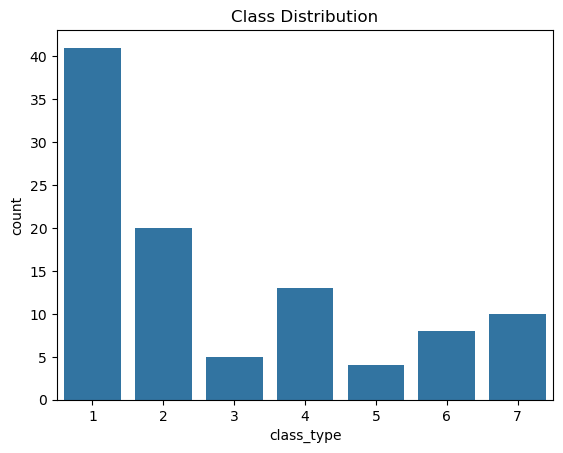

Training Logistic Regression...
Training Decision Tree...
Training KNN...
Training SVM...
Training Random Forest...

Model: Logistic Regression
Accuracy: 0.9524
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1

    accuracy                           0.95        21
   macro avg       0.75      0.83      0.78        21
weighted avg       0.93      0.95      0.94        21

Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]

Model: Decision Tree
Accuracy: 0.9524
Classification Report:
              precision    recall  f1-score   support

           

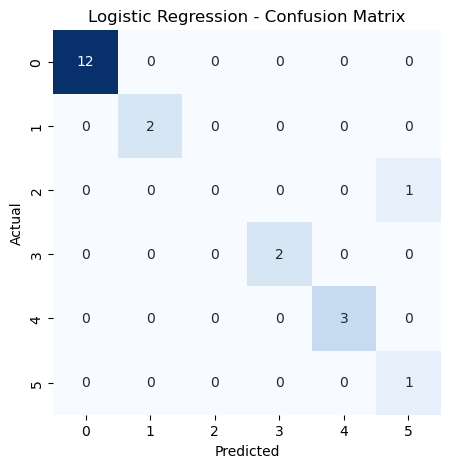

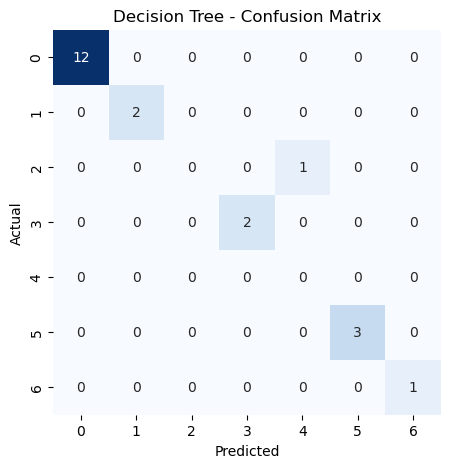

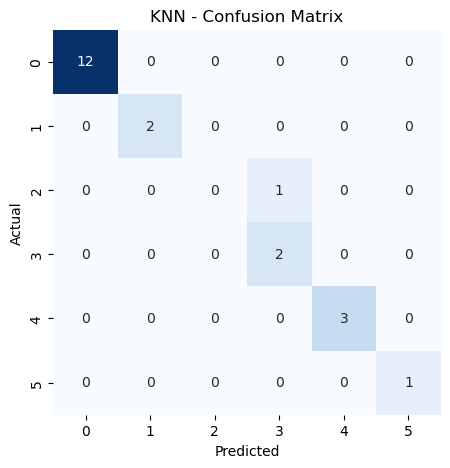

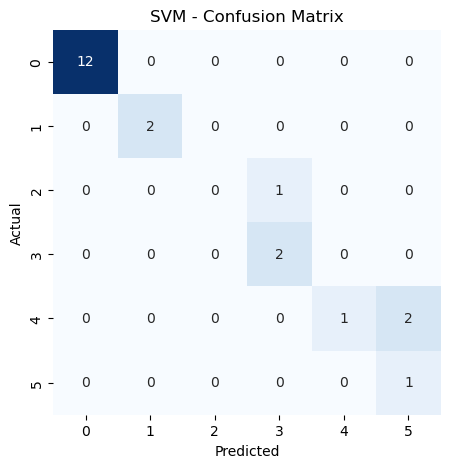

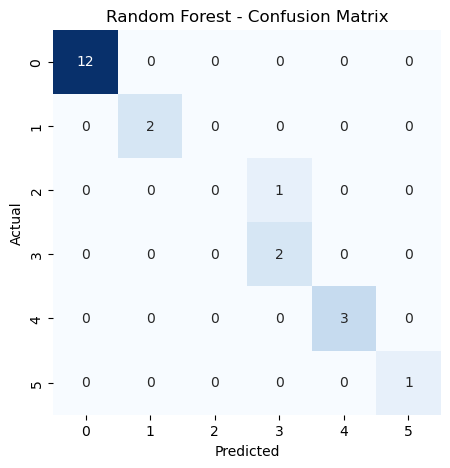

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Step 1: Load and Preprocess Data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
columns = [
    "animal_name",
    "hair",
    "feathers",
    "eggs",
    "milk",
    "airborne",
    "aquatic",
    "predator",
    "toothed",
    "backbone",
    "breathes",
    "venomous",
    "fins",
    "legs",
    "tail",
    "domestic",
    "catsize",
    "class_type"
]
zoo = pd.read_csv(url, names=columns)

# Drop 'animal_name' as it's not a useful feature
zoo.drop("animal_name", axis=1, inplace=True)

# Step 2: Exploratory Data Analysis (EDA)
print(zoo.describe())
print(zoo.info())
sns.countplot(x="class_type", data=zoo)
plt.title("Class Distribution")
plt.show()

# Step 3: Feature Engineering
X = zoo.drop("class_type", axis=1)
y = zoo["class_type"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 5 & 6: Train and Evaluate Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "accuracy": acc,
        "classification_report": report,
        "confusion_matrix": cm,
    }

# Display Results
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Classification Report:")
    print(metrics["classification_report"])
    print("Confusion Matrix:")
    print(metrics["confusion_matrix"])

# Optional: Visualize confusion matrices
for name, metrics in results.items():
    plt.figure(figsize=(5, 5))
    sns.heatmap(
        metrics["confusion_matrix"], annot=True, fmt="d", cmap="Blues", cbar=False
    )
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
